In [2]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

import pandas


# load dataset
dataframe = pandas.read_table('/content/completeallwithNode.txt')
data1 = dataframe.drop("No.", axis=1)
data2 = data1.drop("State", axis =1)
dataset = dataframe.values



# split into input (X) and output (Y) variables

l = 79854   
#l = 18565 + 659
X = dataset[0:l,1:]
# Y = dataset[100:200, 1:10]
# print(X)
# print(X.shape)
labels = []
for i in range (0,l):
  if X[i][9] == 'T':
    labels.append(0)
  else:
    labels.append(1)

features = X[0:l,0:9]

print(len(features))
print(len(features[0]))
print(features)
print(labels)

79854
9
[[24 44 5 ... 0.03688071155039866 0.07360649759034145
  0.016677714846090454]
 [24 34 3 ... 0.04253696661055606 0.0882129092099077 0.016522395460077763]
 [24 36 3 ... 0.04400826005008965 0.06481770478688069
  0.016405861231623044]
 ...
 [42 242 20 ... 0.01962590798163142 0.0724726846867403
  0.004699352964786049]
 [44 241 20 ... 0.02058400848392282 0.07247380150399091
  0.005531143028168605]
 [42 230 22 ... 0.0221067406930489 0.0825651064928123
  0.004773152146913031]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


54995

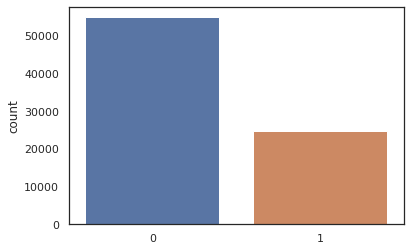

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')


Y_train = labels

# Drop 'label' column
X_train = features


g = sns.countplot(Y_train)

Y_train.count(0)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (9,9,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86
# print(X_train.shape)
# print(X_test.shape)

X_train = X_train.reshape(-1,38191,9,1)
X_test = X_test.reshape(-1,26352,9,1)


In [ ]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] # batch_size
                              , callbacks=[learning_rate_reduction])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
mb = SVC()


# Train our classifier
model = mb.fit(train, train_labels)


preds = mb.predict(test)

print(preds)




# Evaluate accuracy
print(accuracy_score(test_labels, preds))
print(classification_report(test_labels,preds))

[0 0 1 ... 0 1 0]
0.982164541590771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18142
           1       1.00      0.94      0.97      8210

    accuracy                           0.98     26352
   macro avg       0.99      0.97      0.98     26352
weighted avg       0.98      0.98      0.98     26352



In [ ]:
Decission tree
[0 0 1 ... 0 1 0]
0.9651639344262295

KNeighborsClassifier
[0 0 1 ... 0 1 0]
0.9835686095931998
logistic regresion
[0 0 1 ... 0 1 0]
0.9830752884031573
